In [18]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

In [19]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2


def norm(x):
    return (x - train_stats['mean']) / train_stats['std']


def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

In [20]:
# Specify data URI
URI = 'P:/DataSets/ENB2012_data.xlsx'

# Use pandas excel reader
df = pd.read_excel(URI)
df = df.sample(frac=1).reset_index(drop=True)

# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

# Get Y1 and Y2 as the 2 outputs and format them as np arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

# Normalize the training and test data
norm_train_X = norm(train)
norm_test_X = norm(test)

In [21]:
# Define model layers.
input_layer = Input(shape=(len(train .columns),))
first_dense = Dense(units='128', activation='relu')(input_layer)
second_dense = Dense(units='128', activation='relu')(first_dense)

# Y1 output will be fed directly from the second dense
y1_output = Dense(units='1', name='y1_output')(second_dense)
third_dense = Dense(units='64', activation='relu')(second_dense)

# Y2 output will come via the third dense
y2_output = Dense(units='1', name='y2_output')(third_dense)

# Define the model with the input layer and a list of output layers
model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1152        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          16512       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           8256        dense_1[0][0]                    
______________________________________________________________________________________________

In [22]:
# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

C:\Users\Olya\Anaconda3\envs\tfats\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [23]:
# Train the model for 500 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=500, batch_size=10, validation_data=(norm_test_X, test_Y))

Epoch 1/500
62/62 [==============================] - 1s 3ms/step - loss: 246.6166 - y1_output_loss: 115.7284 - y2_output_loss: 130.8881 - y1_output_root_mean_squared_error: 10.7577 - y2_output_root_mean_squared_error: 11.4406 - val_loss: 42.8541 - val_y1_output_loss: 18.4003 - val_y2_output_loss: 24.4537 - val_y1_output_root_mean_squared_error: 4.2896 - val_y2_output_root_mean_squared_error: 4.9451
Epoch 2/500
62/62 [==============================] - 0s 880us/step - loss: 33.8760 - y1_output_loss: 13.3357 - y2_output_loss: 20.5403 - y1_output_root_mean_squared_error: 3.6518 - y2_output_root_mean_squared_error: 4.5321 - val_loss: 29.8907 - val_y1_output_loss: 11.3933 - val_y2_output_loss: 18.4974 - val_y1_output_root_mean_squared_error: 3.3754 - val_y2_output_root_mean_squared_error: 4.3009
Epoch 3/500
62/62 [==============================] - 0s 902us/step - loss: 31.4163 - y1_output_loss: 11.2955 - y2_output_loss: 20.1208 - y1_output_root_mean_squared_error: 3.3609 - y2_output_root_mea

Epoch 22/500
62/62 [==============================] - 0s 885us/step - loss: 14.2683 - y1_output_loss: 5.5474 - y2_output_loss: 8.7209 - y1_output_root_mean_squared_error: 2.3553 - y2_output_root_mean_squared_error: 2.9531 - val_loss: 24.9214 - val_y1_output_loss: 6.5809 - val_y2_output_loss: 18.3405 - val_y1_output_root_mean_squared_error: 2.5653 - val_y2_output_root_mean_squared_error: 4.2826
Epoch 23/500
62/62 [==============================] - 0s 902us/step - loss: 16.6087 - y1_output_loss: 5.6043 - y2_output_loss: 11.0044 - y1_output_root_mean_squared_error: 2.3673 - y2_output_root_mean_squared_error: 3.3173 - val_loss: 12.3005 - val_y1_output_loss: 5.3875 - val_y2_output_loss: 6.9130 - val_y1_output_root_mean_squared_error: 2.3211 - val_y2_output_root_mean_squared_error: 2.6293
Epoch 24/500
62/62 [==============================] - 0s 934us/step - loss: 11.7025 - y1_output_loss: 4.6415 - y2_output_loss: 7.0610 - y1_output_root_mean_squared_error: 2.1544 - y2_output_root_mean_square

Epoch 43/500
62/62 [==============================] - 0s 934us/step - loss: 8.3829 - y1_output_loss: 2.7849 - y2_output_loss: 5.5980 - y1_output_root_mean_squared_error: 1.6688 - y2_output_root_mean_squared_error: 2.3660 - val_loss: 8.9042 - val_y1_output_loss: 2.2018 - val_y2_output_loss: 6.7024 - val_y1_output_root_mean_squared_error: 1.4838 - val_y2_output_root_mean_squared_error: 2.5889
Epoch 44/500
62/62 [==============================] - 0s 1000us/step - loss: 6.3810 - y1_output_loss: 2.2800 - y2_output_loss: 4.1010 - y1_output_root_mean_squared_error: 1.5100 - y2_output_root_mean_squared_error: 2.0251 - val_loss: 6.4978 - val_y1_output_loss: 1.9630 - val_y2_output_loss: 4.5348 - val_y1_output_root_mean_squared_error: 1.4011 - val_y2_output_root_mean_squared_error: 2.1295
Epoch 45/500
62/62 [==============================] - 0s 885us/step - loss: 7.5523 - y1_output_loss: 2.3005 - y2_output_loss: 5.2517 - y1_output_root_mean_squared_error: 1.5167 - y2_output_root_mean_squared_erro

Epoch 64/500
62/62 [==============================] - 0s 902us/step - loss: 6.0494 - y1_output_loss: 1.7272 - y2_output_loss: 4.3222 - y1_output_root_mean_squared_error: 1.3142 - y2_output_root_mean_squared_error: 2.0790 - val_loss: 9.6982 - val_y1_output_loss: 2.4925 - val_y2_output_loss: 7.2056 - val_y1_output_root_mean_squared_error: 1.5788 - val_y2_output_root_mean_squared_error: 2.6843
Epoch 65/500
62/62 [==============================] - 0s 902us/step - loss: 6.8650 - y1_output_loss: 1.9018 - y2_output_loss: 4.9632 - y1_output_root_mean_squared_error: 1.3791 - y2_output_root_mean_squared_error: 2.2278 - val_loss: 5.1527 - val_y1_output_loss: 2.1001 - val_y2_output_loss: 3.0526 - val_y1_output_root_mean_squared_error: 1.4492 - val_y2_output_root_mean_squared_error: 1.7472
Epoch 66/500
62/62 [==============================] - 0s 902us/step - loss: 5.2442 - y1_output_loss: 1.5043 - y2_output_loss: 3.7399 - y1_output_root_mean_squared_error: 1.2265 - y2_output_root_mean_squared_error

Epoch 85/500
62/62 [==============================] - 0s 984us/step - loss: 3.1083 - y1_output_loss: 0.7415 - y2_output_loss: 2.3668 - y1_output_root_mean_squared_error: 0.8611 - y2_output_root_mean_squared_error: 1.5385 - val_loss: 3.0051 - val_y1_output_loss: 1.0738 - val_y2_output_loss: 1.9313 - val_y1_output_root_mean_squared_error: 1.0363 - val_y2_output_root_mean_squared_error: 1.3897
Epoch 86/500
62/62 [==============================] - 0s 902us/step - loss: 3.9948 - y1_output_loss: 1.0528 - y2_output_loss: 2.9421 - y1_output_root_mean_squared_error: 1.0260 - y2_output_root_mean_squared_error: 1.7152 - val_loss: 11.4310 - val_y1_output_loss: 1.7605 - val_y2_output_loss: 9.6705 - val_y1_output_root_mean_squared_error: 1.3268 - val_y2_output_root_mean_squared_error: 3.1097
Epoch 87/500
62/62 [==============================] - 0s 967us/step - loss: 2.9645 - y1_output_loss: 0.7001 - y2_output_loss: 2.2645 - y1_output_root_mean_squared_error: 0.8367 - y2_output_root_mean_squared_erro

62/62 [==============================] - 0s 918us/step - loss: 3.8129 - y1_output_loss: 0.9567 - y2_output_loss: 2.8562 - y1_output_root_mean_squared_error: 0.9781 - y2_output_root_mean_squared_error: 1.6900 - val_loss: 4.0167 - val_y1_output_loss: 1.5652 - val_y2_output_loss: 2.4515 - val_y1_output_root_mean_squared_error: 1.2511 - val_y2_output_root_mean_squared_error: 1.5657
Epoch 106/500
62/62 [==============================] - 0s 902us/step - loss: 7.7432 - y1_output_loss: 2.4244 - y2_output_loss: 5.3189 - y1_output_root_mean_squared_error: 1.5570 - y2_output_root_mean_squared_error: 2.3063 - val_loss: 2.1440 - val_y1_output_loss: 0.5425 - val_y2_output_loss: 1.6015 - val_y1_output_root_mean_squared_error: 0.7366 - val_y2_output_root_mean_squared_error: 1.2655
Epoch 107/500
62/62 [==============================] - 0s 885us/step - loss: 2.4977 - y1_output_loss: 0.6307 - y2_output_loss: 1.8671 - y1_output_root_mean_squared_error: 0.7941 - y2_output_root_mean_squared_error: 1.3664 - 

62/62 [==============================] - 0s 870us/step - loss: 2.2772 - y1_output_loss: 0.5139 - y2_output_loss: 1.7633 - y1_output_root_mean_squared_error: 0.7169 - y2_output_root_mean_squared_error: 1.3279 - val_loss: 4.4000 - val_y1_output_loss: 1.3498 - val_y2_output_loss: 3.0502 - val_y1_output_root_mean_squared_error: 1.1618 - val_y2_output_root_mean_squared_error: 1.7465
Epoch 126/500
62/62 [==============================] - 0s 885us/step - loss: 3.1670 - y1_output_loss: 0.7064 - y2_output_loss: 2.4606 - y1_output_root_mean_squared_error: 0.8405 - y2_output_root_mean_squared_error: 1.5686 - val_loss: 2.1145 - val_y1_output_loss: 0.3451 - val_y2_output_loss: 1.7694 - val_y1_output_root_mean_squared_error: 0.5874 - val_y2_output_root_mean_squared_error: 1.3302
Epoch 127/500
62/62 [==============================] - 0s 885us/step - loss: 4.5909 - y1_output_loss: 1.2658 - y2_output_loss: 3.3251 - y1_output_root_mean_squared_error: 1.1251 - y2_output_root_mean_squared_error: 1.8235 - 

Epoch 146/500
62/62 [==============================] - 0s 918us/step - loss: 2.3797 - y1_output_loss: 0.5536 - y2_output_loss: 1.8261 - y1_output_root_mean_squared_error: 0.7441 - y2_output_root_mean_squared_error: 1.3513 - val_loss: 6.6248 - val_y1_output_loss: 0.6408 - val_y2_output_loss: 5.9839 - val_y1_output_root_mean_squared_error: 0.8005 - val_y2_output_root_mean_squared_error: 2.4462
Epoch 147/500
62/62 [==============================] - 0s 869us/step - loss: 2.4680 - y1_output_loss: 0.4502 - y2_output_loss: 2.0178 - y1_output_root_mean_squared_error: 0.6710 - y2_output_root_mean_squared_error: 1.4205 - val_loss: 1.3799 - val_y1_output_loss: 0.3524 - val_y2_output_loss: 1.0275 - val_y1_output_root_mean_squared_error: 0.5937 - val_y2_output_root_mean_squared_error: 1.0136
Epoch 148/500
62/62 [==============================] - 0s 902us/step - loss: 2.1363 - y1_output_loss: 0.3930 - y2_output_loss: 1.7434 - y1_output_root_mean_squared_error: 0.6269 - y2_output_root_mean_squared_er

Epoch 167/500
62/62 [==============================] - 0s 885us/step - loss: 1.6729 - y1_output_loss: 0.3449 - y2_output_loss: 1.3280 - y1_output_root_mean_squared_error: 0.5873 - y2_output_root_mean_squared_error: 1.1524 - val_loss: 2.0096 - val_y1_output_loss: 0.5452 - val_y2_output_loss: 1.4644 - val_y1_output_root_mean_squared_error: 0.7384 - val_y2_output_root_mean_squared_error: 1.2101
Epoch 168/500
62/62 [==============================] - 0s 951us/step - loss: 1.8254 - y1_output_loss: 0.3564 - y2_output_loss: 1.4690 - y1_output_root_mean_squared_error: 0.5970 - y2_output_root_mean_squared_error: 1.2120 - val_loss: 1.9195 - val_y1_output_loss: 0.2635 - val_y2_output_loss: 1.6560 - val_y1_output_root_mean_squared_error: 0.5133 - val_y2_output_root_mean_squared_error: 1.2869
Epoch 169/500
62/62 [==============================] - 0s 934us/step - loss: 1.6651 - y1_output_loss: 0.3389 - y2_output_loss: 1.3263 - y1_output_root_mean_squared_error: 0.5821 - y2_output_root_mean_squared_er

Epoch 188/500
62/62 [==============================] - 0s 918us/step - loss: 1.3680 - y1_output_loss: 0.2747 - y2_output_loss: 1.0933 - y1_output_root_mean_squared_error: 0.5241 - y2_output_root_mean_squared_error: 1.0456 - val_loss: 1.8733 - val_y1_output_loss: 0.7663 - val_y2_output_loss: 1.1070 - val_y1_output_root_mean_squared_error: 0.8754 - val_y2_output_root_mean_squared_error: 1.0522
Epoch 189/500
62/62 [==============================] - 0s 934us/step - loss: 2.3341 - y1_output_loss: 0.5333 - y2_output_loss: 1.8008 - y1_output_root_mean_squared_error: 0.7303 - y2_output_root_mean_squared_error: 1.3419 - val_loss: 1.2656 - val_y1_output_loss: 0.2991 - val_y2_output_loss: 0.9665 - val_y1_output_root_mean_squared_error: 0.5469 - val_y2_output_root_mean_squared_error: 0.9831
Epoch 190/500
62/62 [==============================] - 0s 934us/step - loss: 1.4992 - y1_output_loss: 0.2657 - y2_output_loss: 1.2335 - y1_output_root_mean_squared_error: 0.5155 - y2_output_root_mean_squared_er

Epoch 209/500
62/62 [==============================] - 0s 902us/step - loss: 1.0434 - y1_output_loss: 0.2441 - y2_output_loss: 0.7993 - y1_output_root_mean_squared_error: 0.4941 - y2_output_root_mean_squared_error: 0.8940 - val_loss: 0.8974 - val_y1_output_loss: 0.2180 - val_y2_output_loss: 0.6794 - val_y1_output_root_mean_squared_error: 0.4669 - val_y2_output_root_mean_squared_error: 0.8242
Epoch 210/500
62/62 [==============================] - 0s 902us/step - loss: 1.2067 - y1_output_loss: 0.3023 - y2_output_loss: 0.9044 - y1_output_root_mean_squared_error: 0.5498 - y2_output_root_mean_squared_error: 0.9510 - val_loss: 1.0032 - val_y1_output_loss: 0.3100 - val_y2_output_loss: 0.6932 - val_y1_output_root_mean_squared_error: 0.5568 - val_y2_output_root_mean_squared_error: 0.8326
Epoch 211/500
62/62 [==============================] - 0s 902us/step - loss: 1.1886 - y1_output_loss: 0.2657 - y2_output_loss: 0.9229 - y1_output_root_mean_squared_error: 0.5155 - y2_output_root_mean_squared_er

62/62 [==============================] - 0s 869us/step - loss: 1.6001 - y1_output_loss: 0.3510 - y2_output_loss: 1.2491 - y1_output_root_mean_squared_error: 0.5925 - y2_output_root_mean_squared_error: 1.1176 - val_loss: 0.9328 - val_y1_output_loss: 0.2122 - val_y2_output_loss: 0.7206 - val_y1_output_root_mean_squared_error: 0.4607 - val_y2_output_root_mean_squared_error: 0.8489
Epoch 230/500
62/62 [==============================] - 0s 902us/step - loss: 1.2431 - y1_output_loss: 0.2579 - y2_output_loss: 0.9852 - y1_output_root_mean_squared_error: 0.5079 - y2_output_root_mean_squared_error: 0.9926 - val_loss: 1.8744 - val_y1_output_loss: 0.3636 - val_y2_output_loss: 1.5108 - val_y1_output_root_mean_squared_error: 0.6030 - val_y2_output_root_mean_squared_error: 1.2291
Epoch 231/500
62/62 [==============================] - 0s 934us/step - loss: 0.9289 - y1_output_loss: 0.2268 - y2_output_loss: 0.7020 - y1_output_root_mean_squared_error: 0.4763 - y2_output_root_mean_squared_error: 0.8379 - 

Epoch 250/500
62/62 [==============================] - 0s 918us/step - loss: 0.8942 - y1_output_loss: 0.1935 - y2_output_loss: 0.7006 - y1_output_root_mean_squared_error: 0.4399 - y2_output_root_mean_squared_error: 0.8370 - val_loss: 0.7902 - val_y1_output_loss: 0.1822 - val_y2_output_loss: 0.6079 - val_y1_output_root_mean_squared_error: 0.4269 - val_y2_output_root_mean_squared_error: 0.7797
Epoch 251/500
62/62 [==============================] - 0s 918us/step - loss: 1.0065 - y1_output_loss: 0.2123 - y2_output_loss: 0.7942 - y1_output_root_mean_squared_error: 0.4607 - y2_output_root_mean_squared_error: 0.8912 - val_loss: 1.8963 - val_y1_output_loss: 0.4217 - val_y2_output_loss: 1.4746 - val_y1_output_root_mean_squared_error: 0.6494 - val_y2_output_root_mean_squared_error: 1.2144
Epoch 252/500
62/62 [==============================] - 0s 902us/step - loss: 1.0771 - y1_output_loss: 0.2323 - y2_output_loss: 0.8448 - y1_output_root_mean_squared_error: 0.4819 - y2_output_root_mean_squared_er

Epoch 271/500
62/62 [==============================] - 0s 869us/step - loss: 0.7414 - y1_output_loss: 0.2052 - y2_output_loss: 0.5362 - y1_output_root_mean_squared_error: 0.4530 - y2_output_root_mean_squared_error: 0.7323 - val_loss: 1.3051 - val_y1_output_loss: 0.2395 - val_y2_output_loss: 1.0656 - val_y1_output_root_mean_squared_error: 0.4894 - val_y2_output_root_mean_squared_error: 1.0323
Epoch 272/500
62/62 [==============================] - 0s 918us/step - loss: 0.8080 - y1_output_loss: 0.1855 - y2_output_loss: 0.6225 - y1_output_root_mean_squared_error: 0.4307 - y2_output_root_mean_squared_error: 0.7890 - val_loss: 0.7740 - val_y1_output_loss: 0.1905 - val_y2_output_loss: 0.5835 - val_y1_output_root_mean_squared_error: 0.4364 - val_y2_output_root_mean_squared_error: 0.7639
Epoch 273/500
62/62 [==============================] - 0s 934us/step - loss: 0.7101 - y1_output_loss: 0.1728 - y2_output_loss: 0.5373 - y1_output_root_mean_squared_error: 0.4157 - y2_output_root_mean_squared_er

Epoch 292/500
62/62 [==============================] - 0s 919us/step - loss: 1.4957 - y1_output_loss: 0.3868 - y2_output_loss: 1.1089 - y1_output_root_mean_squared_error: 0.6220 - y2_output_root_mean_squared_error: 1.0530 - val_loss: 1.1126 - val_y1_output_loss: 0.2331 - val_y2_output_loss: 0.8795 - val_y1_output_root_mean_squared_error: 0.4829 - val_y2_output_root_mean_squared_error: 0.9378
Epoch 293/500
62/62 [==============================] - 0s 934us/step - loss: 0.8352 - y1_output_loss: 0.2139 - y2_output_loss: 0.6213 - y1_output_root_mean_squared_error: 0.4625 - y2_output_root_mean_squared_error: 0.7882 - val_loss: 0.9954 - val_y1_output_loss: 0.1821 - val_y2_output_loss: 0.8133 - val_y1_output_root_mean_squared_error: 0.4267 - val_y2_output_root_mean_squared_error: 0.9018
Epoch 294/500
62/62 [==============================] - 0s 852us/step - loss: 0.7281 - y1_output_loss: 0.1838 - y2_output_loss: 0.5443 - y1_output_root_mean_squared_error: 0.4287 - y2_output_root_mean_squared_er

Epoch 313/500
62/62 [==============================] - 0s 935us/step - loss: 0.5654 - y1_output_loss: 0.1544 - y2_output_loss: 0.4109 - y1_output_root_mean_squared_error: 0.3930 - y2_output_root_mean_squared_error: 0.6410 - val_loss: 0.7158 - val_y1_output_loss: 0.2187 - val_y2_output_loss: 0.4971 - val_y1_output_root_mean_squared_error: 0.4677 - val_y2_output_root_mean_squared_error: 0.7050
Epoch 314/500
62/62 [==============================] - 0s 918us/step - loss: 0.5982 - y1_output_loss: 0.1636 - y2_output_loss: 0.4346 - y1_output_root_mean_squared_error: 0.4045 - y2_output_root_mean_squared_error: 0.6592 - val_loss: 0.7792 - val_y1_output_loss: 0.1878 - val_y2_output_loss: 0.5914 - val_y1_output_root_mean_squared_error: 0.4334 - val_y2_output_root_mean_squared_error: 0.7690
Epoch 315/500
62/62 [==============================] - 0s 918us/step - loss: 0.7210 - y1_output_loss: 0.1674 - y2_output_loss: 0.5536 - y1_output_root_mean_squared_error: 0.4092 - y2_output_root_mean_squared_er

Epoch 334/500
62/62 [==============================] - 0s 968us/step - loss: 0.5717 - y1_output_loss: 0.1604 - y2_output_loss: 0.4114 - y1_output_root_mean_squared_error: 0.4005 - y2_output_root_mean_squared_error: 0.6414 - val_loss: 0.6597 - val_y1_output_loss: 0.1697 - val_y2_output_loss: 0.4900 - val_y1_output_root_mean_squared_error: 0.4119 - val_y2_output_root_mean_squared_error: 0.7000
Epoch 335/500
62/62 [==============================] - 0s 934us/step - loss: 0.5541 - y1_output_loss: 0.1513 - y2_output_loss: 0.4028 - y1_output_root_mean_squared_error: 0.3889 - y2_output_root_mean_squared_error: 0.6347 - val_loss: 1.0467 - val_y1_output_loss: 0.3057 - val_y2_output_loss: 0.7409 - val_y1_output_root_mean_squared_error: 0.5529 - val_y2_output_root_mean_squared_error: 0.8608
Epoch 336/500
62/62 [==============================] - 0s 951us/step - loss: 0.5382 - y1_output_loss: 0.1733 - y2_output_loss: 0.3649 - y1_output_root_mean_squared_error: 0.4163 - y2_output_root_mean_squared_er

Epoch 355/500
62/62 [==============================] - 0s 967us/step - loss: 0.5130 - y1_output_loss: 0.1332 - y2_output_loss: 0.3798 - y1_output_root_mean_squared_error: 0.3649 - y2_output_root_mean_squared_error: 0.6163 - val_loss: 0.7671 - val_y1_output_loss: 0.2266 - val_y2_output_loss: 0.5406 - val_y1_output_root_mean_squared_error: 0.4760 - val_y2_output_root_mean_squared_error: 0.7352
Epoch 356/500
62/62 [==============================] - 0s 902us/step - loss: 0.5591 - y1_output_loss: 0.1806 - y2_output_loss: 0.3785 - y1_output_root_mean_squared_error: 0.4250 - y2_output_root_mean_squared_error: 0.6152 - val_loss: 0.6457 - val_y1_output_loss: 0.1750 - val_y2_output_loss: 0.4707 - val_y1_output_root_mean_squared_error: 0.4183 - val_y2_output_root_mean_squared_error: 0.6861
Epoch 357/500
62/62 [==============================] - 0s 902us/step - loss: 0.4901 - y1_output_loss: 0.1473 - y2_output_loss: 0.3428 - y1_output_root_mean_squared_error: 0.3838 - y2_output_root_mean_squared_er

Epoch 376/500
62/62 [==============================] - 0s 902us/step - loss: 0.4780 - y1_output_loss: 0.1647 - y2_output_loss: 0.3132 - y1_output_root_mean_squared_error: 0.4059 - y2_output_root_mean_squared_error: 0.5597 - val_loss: 0.6560 - val_y1_output_loss: 0.1912 - val_y2_output_loss: 0.4649 - val_y1_output_root_mean_squared_error: 0.4372 - val_y2_output_root_mean_squared_error: 0.6818
Epoch 377/500
62/62 [==============================] - 0s 918us/step - loss: 0.5220 - y1_output_loss: 0.1482 - y2_output_loss: 0.3738 - y1_output_root_mean_squared_error: 0.3850 - y2_output_root_mean_squared_error: 0.6114 - val_loss: 0.5762 - val_y1_output_loss: 0.1440 - val_y2_output_loss: 0.4321 - val_y1_output_root_mean_squared_error: 0.3795 - val_y2_output_root_mean_squared_error: 0.6574
Epoch 378/500
62/62 [==============================] - 0s 951us/step - loss: 0.7326 - y1_output_loss: 0.1985 - y2_output_loss: 0.5341 - y1_output_root_mean_squared_error: 0.4455 - y2_output_root_mean_squared_er

Epoch 397/500
62/62 [==============================] - 0s 902us/step - loss: 0.4031 - y1_output_loss: 0.1396 - y2_output_loss: 0.2635 - y1_output_root_mean_squared_error: 0.3736 - y2_output_root_mean_squared_error: 0.5133 - val_loss: 0.5407 - val_y1_output_loss: 0.1596 - val_y2_output_loss: 0.3811 - val_y1_output_root_mean_squared_error: 0.3995 - val_y2_output_root_mean_squared_error: 0.6173
Epoch 398/500
62/62 [==============================] - 0s 885us/step - loss: 0.4010 - y1_output_loss: 0.1202 - y2_output_loss: 0.2808 - y1_output_root_mean_squared_error: 0.3466 - y2_output_root_mean_squared_error: 0.5299 - val_loss: 0.7083 - val_y1_output_loss: 0.2249 - val_y2_output_loss: 0.4834 - val_y1_output_root_mean_squared_error: 0.4742 - val_y2_output_root_mean_squared_error: 0.6953
Epoch 399/500
62/62 [==============================] - 0s 902us/step - loss: 0.4096 - y1_output_loss: 0.1428 - y2_output_loss: 0.2668 - y1_output_root_mean_squared_error: 0.3779 - y2_output_root_mean_squared_er

Epoch 418/500
62/62 [==============================] - 0s 902us/step - loss: 0.3831 - y1_output_loss: 0.1327 - y2_output_loss: 0.2504 - y1_output_root_mean_squared_error: 0.3643 - y2_output_root_mean_squared_error: 0.5004 - val_loss: 0.7586 - val_y1_output_loss: 0.1989 - val_y2_output_loss: 0.5598 - val_y1_output_root_mean_squared_error: 0.4459 - val_y2_output_root_mean_squared_error: 0.7482
Epoch 419/500
62/62 [==============================] - 0s 951us/step - loss: 0.4895 - y1_output_loss: 0.1589 - y2_output_loss: 0.3306 - y1_output_root_mean_squared_error: 0.3987 - y2_output_root_mean_squared_error: 0.5750 - val_loss: 0.7465 - val_y1_output_loss: 0.2730 - val_y2_output_loss: 0.4734 - val_y1_output_root_mean_squared_error: 0.5225 - val_y2_output_root_mean_squared_error: 0.6881
Epoch 420/500
62/62 [==============================] - 0s 935us/step - loss: 0.3811 - y1_output_loss: 0.1327 - y2_output_loss: 0.2484 - y1_output_root_mean_squared_error: 0.3643 - y2_output_root_mean_squared_er

Epoch 439/500
62/62 [==============================] - 0s 885us/step - loss: 0.3498 - y1_output_loss: 0.1222 - y2_output_loss: 0.2277 - y1_output_root_mean_squared_error: 0.3495 - y2_output_root_mean_squared_error: 0.4771 - val_loss: 0.8700 - val_y1_output_loss: 0.3281 - val_y2_output_loss: 0.5419 - val_y1_output_root_mean_squared_error: 0.5728 - val_y2_output_root_mean_squared_error: 0.7361
Epoch 440/500
62/62 [==============================] - 0s 869us/step - loss: 0.5383 - y1_output_loss: 0.1532 - y2_output_loss: 0.3851 - y1_output_root_mean_squared_error: 0.3914 - y2_output_root_mean_squared_error: 0.6205 - val_loss: 0.5758 - val_y1_output_loss: 0.1944 - val_y2_output_loss: 0.3814 - val_y1_output_root_mean_squared_error: 0.4409 - val_y2_output_root_mean_squared_error: 0.6176
Epoch 441/500
62/62 [==============================] - 0s 885us/step - loss: 0.3904 - y1_output_loss: 0.1144 - y2_output_loss: 0.2759 - y1_output_root_mean_squared_error: 0.3383 - y2_output_root_mean_squared_er

Epoch 460/500
62/62 [==============================] - 0s 852us/step - loss: 0.7593 - y1_output_loss: 0.2276 - y2_output_loss: 0.5317 - y1_output_root_mean_squared_error: 0.4771 - y2_output_root_mean_squared_error: 0.7292 - val_loss: 0.5125 - val_y1_output_loss: 0.1657 - val_y2_output_loss: 0.3468 - val_y1_output_root_mean_squared_error: 0.4070 - val_y2_output_root_mean_squared_error: 0.5889
Epoch 461/500
62/62 [==============================] - 0s 852us/step - loss: 0.3102 - y1_output_loss: 0.1067 - y2_output_loss: 0.2035 - y1_output_root_mean_squared_error: 0.3267 - y2_output_root_mean_squared_error: 0.4511 - val_loss: 0.5130 - val_y1_output_loss: 0.1709 - val_y2_output_loss: 0.3421 - val_y1_output_root_mean_squared_error: 0.4134 - val_y2_output_root_mean_squared_error: 0.5849
Epoch 462/500
62/62 [==============================] - 0s 885us/step - loss: 0.3491 - y1_output_loss: 0.1137 - y2_output_loss: 0.2355 - y1_output_root_mean_squared_error: 0.3371 - y2_output_root_mean_squared_er

Epoch 481/500
62/62 [==============================] - 0s 853us/step - loss: 0.3100 - y1_output_loss: 0.1085 - y2_output_loss: 0.2015 - y1_output_root_mean_squared_error: 0.3294 - y2_output_root_mean_squared_error: 0.4489 - val_loss: 0.5920 - val_y1_output_loss: 0.1706 - val_y2_output_loss: 0.4214 - val_y1_output_root_mean_squared_error: 0.4130 - val_y2_output_root_mean_squared_error: 0.6491
Epoch 482/500
62/62 [==============================] - 0s 951us/step - loss: 0.3500 - y1_output_loss: 0.1314 - y2_output_loss: 0.2186 - y1_output_root_mean_squared_error: 0.3624 - y2_output_root_mean_squared_error: 0.4676 - val_loss: 1.3506 - val_y1_output_loss: 0.4143 - val_y2_output_loss: 0.9363 - val_y1_output_root_mean_squared_error: 0.6436 - val_y2_output_root_mean_squared_error: 0.9676
Epoch 483/500
62/62 [==============================] - 0s 951us/step - loss: 0.3271 - y1_output_loss: 0.1194 - y2_output_loss: 0.2077 - y1_output_root_mean_squared_error: 0.3456 - y2_output_root_mean_squared_er

In [24]:
# Test the model and print loss and mse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 757us/step - loss: 0.4830 - y1_output_loss: 0.1627 - y2_output_loss: 0.3203 - y1_output_root_mean_squared_error: 0.4034 - y2_output_root_mean_squared_error: 0.5660
Loss = 0.4830397665500641, Y1_loss = 0.1627284437417984, Y1_mse = 0.4033961296081543, Y2_loss = 0.3203113079071045, Y2_mse = 0.5659605264663696


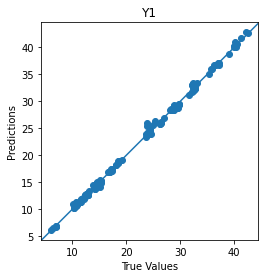

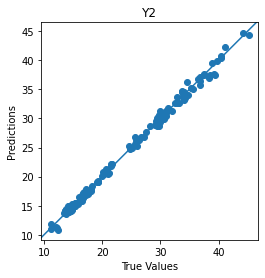

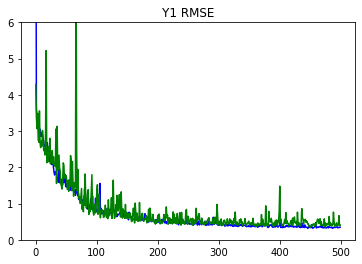

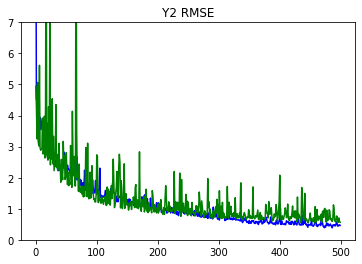

In [25]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)